# CKD prediction using Machine Learning Techniques such as DT, KNN, NB, RF, Logreg SVM and ANN(MLP)

In [142]:
# import liberaries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import keras as k
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import style


#data source 'https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar'

In [143]:
kidney_disease = 'kidney_disease.csv'
df = pd.read_csv(kidney_disease)

In [144]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [145]:
df.shape

(400, 25)

In [146]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [147]:
# filing 9 NAN indices of 'age' col with its average value
avgage = round(df['age'].mean(), 2)
df['age'].fillna(avgage, inplace=True)
df.isna().sum()

age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [148]:
# Similarly filing 12 NAN indices of 'bp' col with its average value
avgbp = round(df['bp'].mean(), 2)
df['bp'].fillna(avgbp, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [149]:
# filing 47 NAN indices of 'sg' col with its average value
avgsg = round(df['sg'].mean(), 2)
df['sg'].fillna(avgsg, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [150]:
# df['al'].dtypes
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [151]:
# filing 46 NAN indices of 'al' col with its average value
avgal = round(df['al'].mean(), 2)
df['al'].fillna(avgal, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [152]:
# filing 49 NAN indices of 'su' col with its average value
avgsu = round(df['su'].mean(), 2)
df['su'].fillna(avgsu, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [153]:
df['rbc'].unique().tolist()

[nan, 'normal', 'abnormal']

In [154]:
df.drop(['rbc'], axis=1, inplace=True)

# Droping initially less important Column

In [155]:
df['ba'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [156]:
df.drop(['pc', 'pcc', 'ba'], axis=1, inplace=True)

In [157]:
df.shape

(400, 21)

In [158]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [159]:
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [160]:
# Let's fill again 44 NAN indices of numeric 'bgr' col with its average value
avgbgr = round(df['bgr'].mean(), 2)
df['bgr'].fillna(avgbgr, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [161]:
# filling 19 NAN indices of col 'bu' with its average value
avgbu = round(df['bu'].mean(), 2)
df['bu'].fillna(avgbu, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [162]:
# filling 17 NAN indices of col 'sc' with its average value
avgsc = round(df['sc'].mean(), 2)
df['sc'].fillna(avgsc, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [163]:
# again filling 87 NAN indices of col 'sod' with its average value
avgsod = round(df['sod'].mean(), 2)
df['sod'].fillna(avgsod, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [164]:
# filling 88 NAN indices of col 'pot' with its average value
avgpot = round(df['pot'].mean(), 2)
df['pot'].fillna(avgpot, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [165]:
# filling 52 NAN indices of col 'hemo' with its average value
avghemo = round(df['hemo'].mean(), 2)
df['hemo'].fillna(avghemo, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [166]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [167]:
df['pcv'].replace('\t?', '0', inplace=True)

In [168]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '0', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [169]:
df['pcv'].replace('\t43', '43', inplace=True)

In [170]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '0', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [171]:
df['pcv'].dtypes

dtype('O')

In [172]:
df['pcv'] = df['pcv'].astype(float)

In [173]:
df['pcv'].dtypes

dtype('float64')

In [174]:
df['pcv'].isna().sum()

70

In [175]:
# Now, filling 70 NAN indices of col 'pcv' with its average value
avgpcv = round(df['pcv'].mean(), 2)
df['pcv'].fillna(avgpcv, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [176]:

df['pcv'].unique()

array([44.  , 38.  , 31.  , 32.  , 35.  , 39.  , 36.  , 33.  , 29.  ,
       28.  , 38.77, 16.  , 24.  , 37.  , 30.  , 34.  , 40.  , 45.  ,
       27.  , 48.  ,  0.  , 52.  , 14.  , 22.  , 18.  , 42.  , 17.  ,
       46.  , 23.  , 19.  , 25.  , 41.  , 26.  , 15.  , 21.  , 43.  ,
       20.  , 47.  ,  9.  , 49.  , 50.  , 53.  , 51.  , 54.  ])

In [177]:
df['pcv'].replace(0, avgpcv, inplace=True)

In [178]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [179]:
df['wc'].replace("\t?", "0", inplace=True)

In [180]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '0', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [181]:
df['wc'].replace("\t6200", "6200", inplace=True)

In [182]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '\t8400', '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100', '0',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [183]:
df['wc'].replace("\t8400", "8400", inplace=True)

In [184]:
df['wc'].dtypes

dtype('O')

In [185]:
df['wc'] = df['wc'].astype(float)

In [186]:
df['wc'].dtypes

dtype('float64')

In [187]:
df['wc'].isna().sum()

105

In [188]:
# Again, filling 105 NAN indices of col 'wc' with its average value
avgwc = round(df['wc'].mean(), 2)
df['wc'].fillna(avgwc, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [189]:
df['wc'].unique()

array([ 7800.  ,  6000.  ,  7500.  ,  6700.  ,  7300.  ,  8377.63,
        6900.  ,  9600.  , 12100.  ,  4500.  , 12200.  , 11000.  ,
        3800.  , 11400.  ,  5300.  ,  9200.  ,  6200.  ,  8300.  ,
        8400.  , 10300.  ,  9800.  ,  9100.  ,  7900.  ,  6400.  ,
        8600.  , 18900.  , 21600.  ,  4300.  ,  8500.  , 11300.  ,
        7200.  ,  7700.  , 14600.  ,  6300.  ,  7100.  , 11800.  ,
        9400.  ,  5500.  ,  5800.  , 13200.  , 12500.  ,  5600.  ,
        7000.  , 11900.  , 10400.  , 10700.  , 12700.  ,  6800.  ,
        6500.  , 13600.  , 10200.  ,  9000.  , 14900.  ,  8200.  ,
       15200.  ,  5000.  , 16300.  , 12400.  , 10500.  ,  4200.  ,
        4700.  , 10900.  ,  8100.  ,  9500.  ,  2200.  , 12800.  ,
       11200.  , 19100.  ,     0.  , 12300.  , 16700.  ,  2600.  ,
       26400.  ,  8800.  ,  7400.  ,  4900.  ,  8000.  , 12000.  ,
       15700.  ,  4100.  ,  5700.  , 11500.  ,  5400.  , 10800.  ,
        9900.  ,  5200.  ,  5900.  ,  9300.  ,  9700.  ,  5100

In [190]:
df['wc'].replace(0, avgwc, inplace=True)

In [191]:
df['wc'].unique()

array([ 7800.  ,  6000.  ,  7500.  ,  6700.  ,  7300.  ,  8377.63,
        6900.  ,  9600.  , 12100.  ,  4500.  , 12200.  , 11000.  ,
        3800.  , 11400.  ,  5300.  ,  9200.  ,  6200.  ,  8300.  ,
        8400.  , 10300.  ,  9800.  ,  9100.  ,  7900.  ,  6400.  ,
        8600.  , 18900.  , 21600.  ,  4300.  ,  8500.  , 11300.  ,
        7200.  ,  7700.  , 14600.  ,  6300.  ,  7100.  , 11800.  ,
        9400.  ,  5500.  ,  5800.  , 13200.  , 12500.  ,  5600.  ,
        7000.  , 11900.  , 10400.  , 10700.  , 12700.  ,  6800.  ,
        6500.  , 13600.  , 10200.  ,  9000.  , 14900.  ,  8200.  ,
       15200.  ,  5000.  , 16300.  , 12400.  , 10500.  ,  4200.  ,
        4700.  , 10900.  ,  8100.  ,  9500.  ,  2200.  , 12800.  ,
       11200.  , 19100.  , 12300.  , 16700.  ,  2600.  , 26400.  ,
        8800.  ,  7400.  ,  4900.  ,  8000.  , 12000.  , 15700.  ,
        4100.  ,  5700.  , 11500.  ,  5400.  , 10800.  ,  9900.  ,
        5200.  ,  5900.  ,  9300.  ,  9700.  ,  5100.  ,  6600

In [192]:
df['wc'].dtypes

dtype('float64')

In [193]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '\t?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [194]:
df['rc'].replace('\t?', '0', inplace=True)

In [195]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '0', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [196]:
df['rc'].dtypes

dtype('O')

In [197]:
df['rc'] = df['rc'].astype(float)

In [198]:

df['rc'].dtypes

dtype('float64')

In [199]:
# Now, filling 130 NAN indices of col 'rc' with its average value
avgrc = round(df['rc'].mean(), 2)
df['rc'].fillna(avgrc, inplace=True)
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [200]:
df['rc'].unique()

array([5.2 , 4.69, 3.9 , 4.6 , 4.4 , 5.  , 4.  , 3.7 , 3.8 , 3.4 , 2.6 ,
       2.8 , 4.3 , 3.2 , 3.6 , 4.1 , 4.9 , 2.5 , 4.2 , 4.5 , 3.1 , 4.7 ,
       3.5 , 6.  , 2.1 , 5.6 , 2.3 , 2.9 , 2.7 , 8.  , 3.3 , 3.  , 2.4 ,
       4.8 , 0.  , 5.4 , 6.1 , 6.2 , 6.3 , 5.1 , 5.8 , 5.5 , 5.3 , 6.4 ,
       5.7 , 5.9 , 6.5 ])

In [201]:
df['rc'].replace(0, avgrc, inplace=True)

In [202]:
# df[['ane']]

In [203]:
df['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

# Here remaining 'cad', 'appet', 'pe', 'ane' all columns contain yes or no, good or bad binary types of values, therefore I think these attributes are less significant for the target. If requre to achive height accurecy we may use them to build our model later. But for now lets drop these attributes.

In [204]:
df.drop([ 'cad', 'appet', 'pe', 'ane'], axis=1, inplace=True) #to drop feautres that we dont need

In [205]:
df.shape

(400, 17)

In [206]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [207]:
df['classification'].replace('ckd\t', 'ckd', inplace=True)

In [208]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [209]:
import seaborn as sns

In [210]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /opt/conda/lib/python3.9/site-packages (0.11.2)

Requirement already satisfied: matplotlib>=2.2 in /opt/conda/lib/python3.9/site-packages (from seaborn) (3.4.1)

Requirement already satisfied: pandas>=0.23 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.2.4)

Requirement already satisfied: scipy>=1.0 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.6.3)

Requirement already satisfied: numpy>=1.15 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.22.2)

Requirement already satisfied: python-dateutil>=2.7 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (2.8.2)

Requirement already satisfied: kiwisolver>=1.0.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (1.3.2)

Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (0.11.0)

Requirement already satisfied: pillow>=6.2.0 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (8.3.2)

Requirement already satisfied: pyparsing>=2.2.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (2.4.7)

Requirement already satisfied: pytz>=2017.3 in /opt/conda/lib/python3.9/site-packages (from pandas>=0.23->seaborn) (2021.1)

Requirement already satisfied: six>=1.5 in /opt/conda/lib/python3.9/site-packages (from python-dateutil>=2.7->matplotlib>=2.2->seaborn) (1.16.0)

0

In [211]:
import seaborn as sns

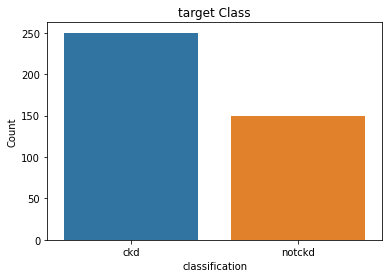

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [212]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']== 'ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']== 'notckd'])/len(df['classification'])*100,2),"%")

In [213]:
# Store Clean data in csv file
df.to_csv('cleanedckddata.csv', index = False, encoding='utf-8') #mar='\t'

In [214]:
# if ckd then output is 1 - and if not ckd then output is 0
# if htn then output is 1 - and if not htn then output is 0
# if dm then output is 1 - and if not dm then output is 0
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,yes,yes,ckd
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,yes,no,ckd
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,no,no,ckd


# Transform data to numeric

In [215]:
# Converting Categorical 'classification' col to Numeric value
df['classification'] = np.where(df['classification']=='ckd', 1, 0)
df['htn'] = np.where(df['htn']=='yes', 1, 0)
df['dm'] = np.where(df['dm']=='yes', 1, 0) 

In [216]:
# if ckd then output is 1 - and if not ckd then output is 0
# if htn then output is 1 - and if not htn then output is 0
# if dm then output is 1 - and if not dm then output is 0
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,1,1,1
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,0,0,1


In [217]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.469100,1.017712,1.017300,0.450125,148.036900,57.425925,3.07235,137.529025,4.627850,12.526900,38.864175,8398.571950,4.701725,0.367500,0.335000,0.625000
std,16.974966,13.476298,0.005434,1.272318,1.029487,74.782634,49.285887,5.61749,9.204273,2.819783,2.716171,8.151199,2523.251388,0.840354,0.482728,0.472582,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.40000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.90000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000
50%,54.000000,78.235000,1.020000,1.000000,0.000000,126.000000,44.000000,1.40000,137.530000,4.630000,12.530000,38.770000,8377.630000,4.690000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450000,150.000000,61.750000,3.07000,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.00000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  htn             400 non-null    int64  
 15  dm              400 non-null    int64  
 16  classification  400 non-null    int64  
dtypes: float64(14), int64(3)
memory usa

In [219]:
df.shape

(400, 17)

In [220]:
df.isna().any()

age               False
bp                False
sg                False
al                False
su                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
classification    False
dtype: bool

In [221]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
classification    0
dtype: int64

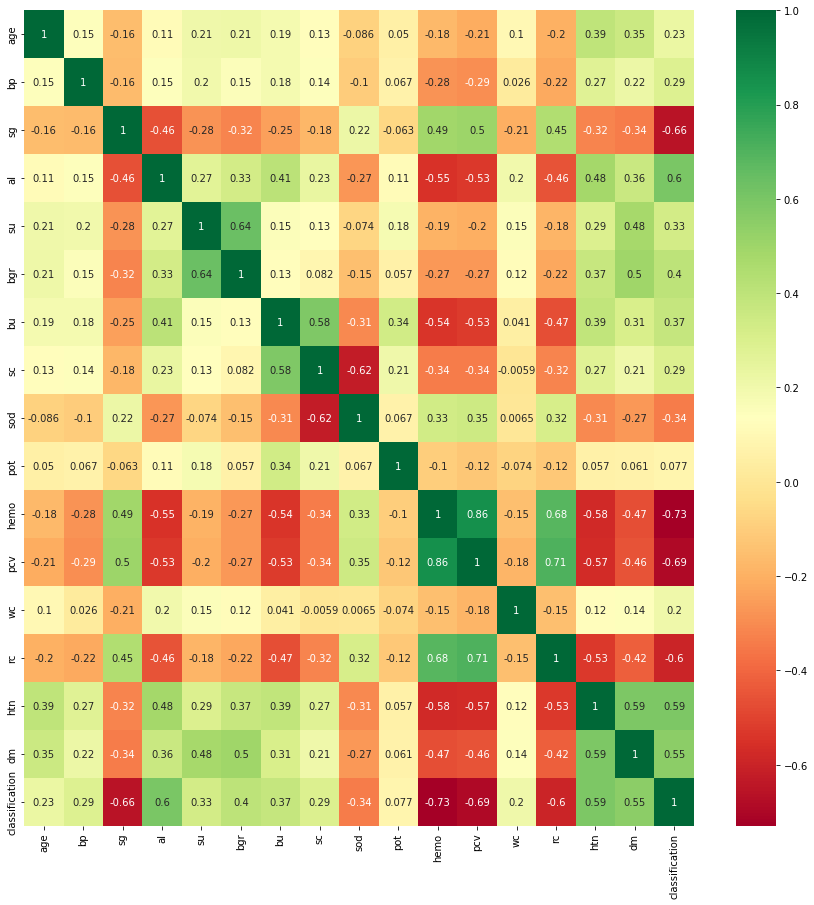

In [222]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

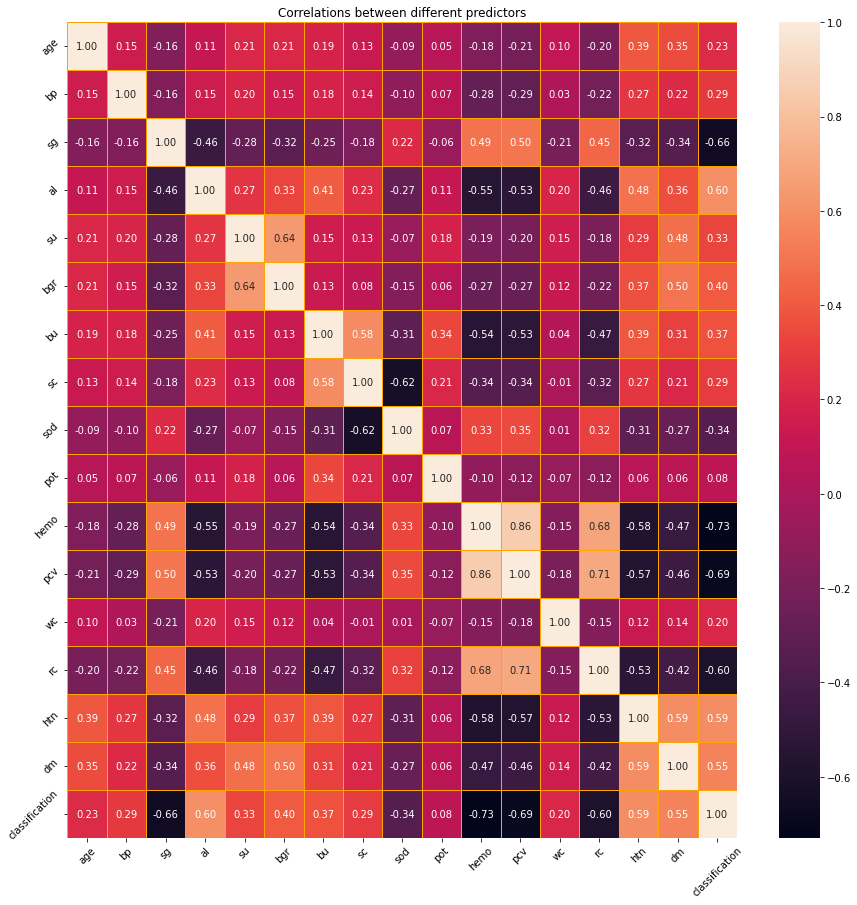

In [223]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

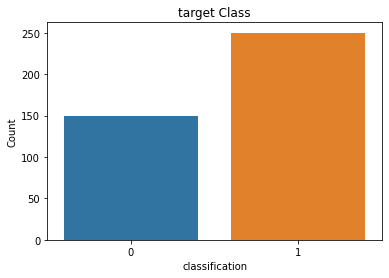

Percent of chronic kidney disease sample:  0.0 %
Percent of not a chronic kidney disease sample:  0.0 %


In [224]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']== 'ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']== 'notckd'])/len(df['classification'])*100,2),"%")

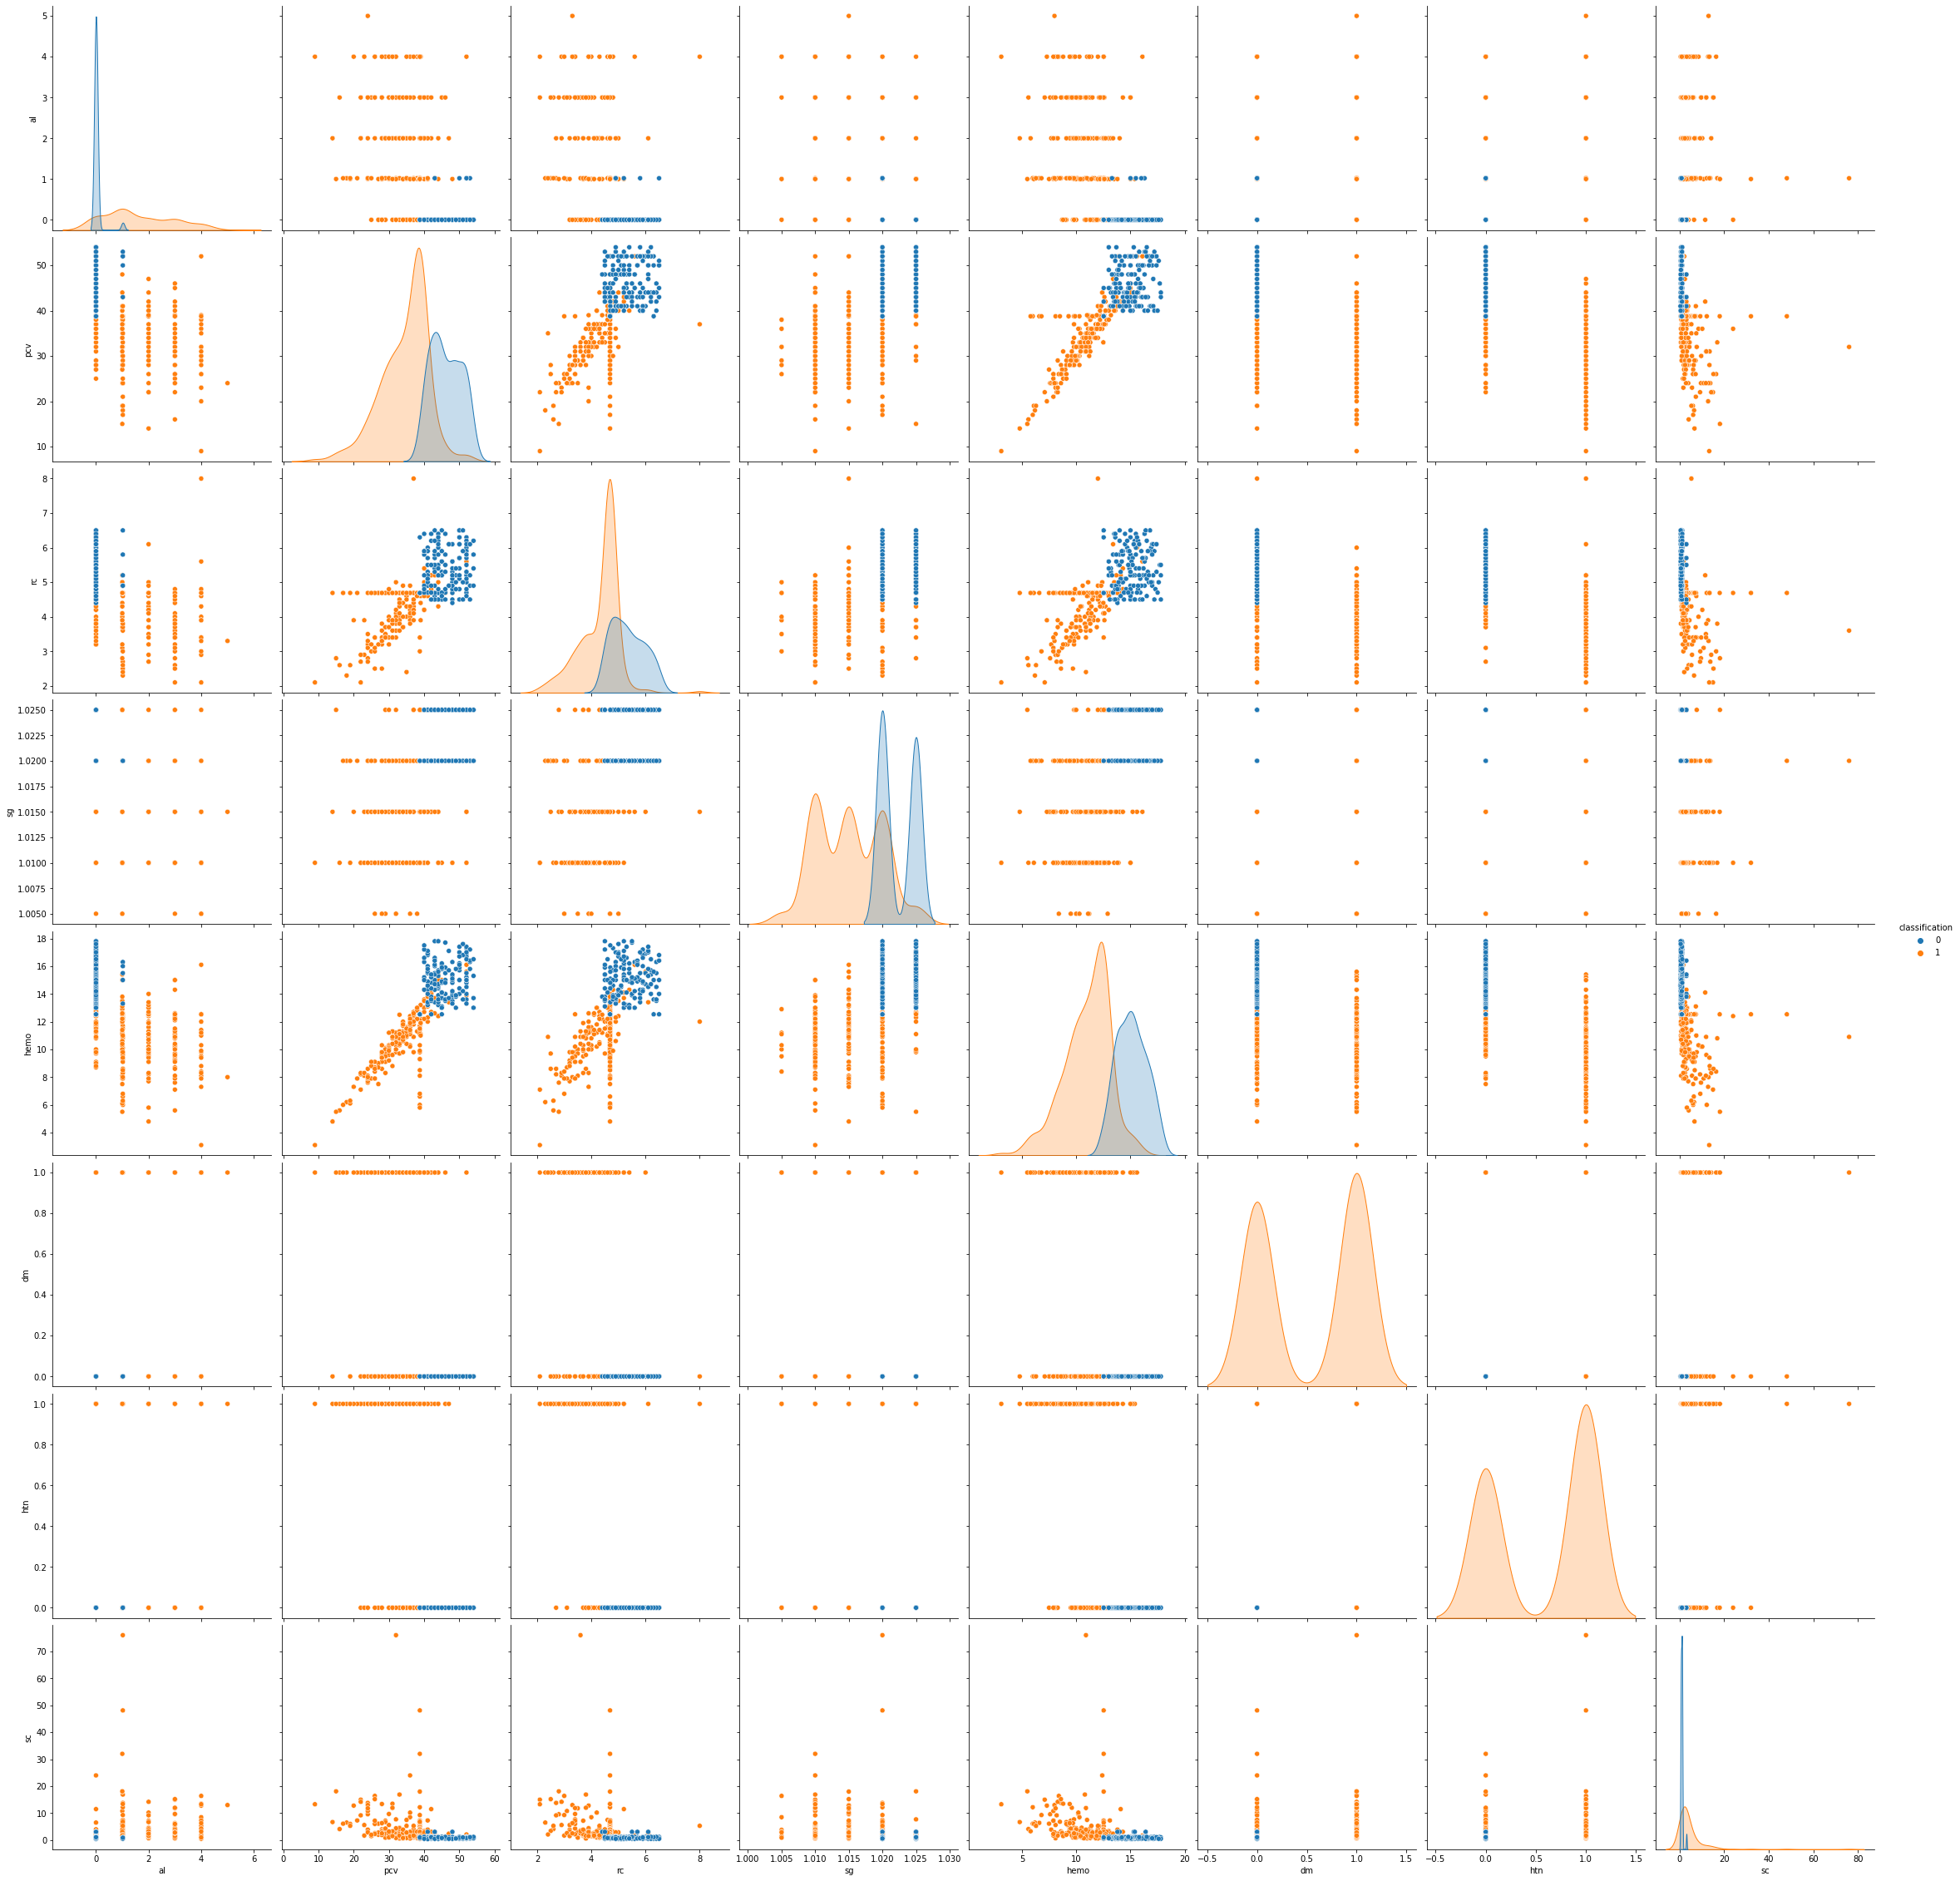

In [225]:
# Checking data distributions between some highly correlated columns
sns.pairplot(df[['al', 'pcv', 'rc', 'sg', 'hemo', 'dm', 'htn', 'sc', 'classification']], hue='classification', height=4)

In [226]:
df['classification'].unique()

array([1, 0])

In [227]:
#create  a list of  the col name to keep based on correlation
columns_to_retain =  ['sg', 'al', 'rc', 'sc', 'su', 'dm', 'hemo', 'pcv', 'htn', 'classification']

columns_to_retain

['sg', 'al', 'rc', 'sc', 'su', 'dm', 'hemo', 'pcv', 'htn', 'classification']

In [228]:
#now we have to create a new data set  without any other column except the column that we want to retain
#drop the columns that are not in columns to retain
#Drop the columns that are not in columns_2_retain. and create a new dataset
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1)
#drop the rows with na or missing values # or df = df.dropna(inplace=True)
df= df.dropna(axis = 0)
df.head()

,sg,al,su,sc,hemo,pcv,rc,htn,dm,classification
0,1.020,1.0,0.0,1.2,15.4,44.0,5.20,1,1,1
1,1.020,4.0,0.0,0.8,11.3,38.0,4.69,0,0,1
2,1.010,2.0,3.0,1.8,9.6,31.0,4.69,0,1,1
3,1.005,4.0,0.0,3.8,11.2,32.0,3.90,1,0,1
4,1.010,2.0,0.0,1.4,11.6,35.0,4.60,0,0,1


In [229]:
df.describe()

,sg,al,su,sc,hemo,pcv,rc,htn,dm,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.017712,1.017300,0.450125,3.07235,12.526900,38.864175,4.701725,0.367500,0.335000,0.625000
std,0.005434,1.272318,1.029487,5.61749,2.716171,8.151199,0.840354,0.482728,0.472582,0.484729
min,1.005000,0.000000,0.000000,0.40000,3.100000,9.000000,2.100000,0.000000,0.000000,0.000000
25%,1.015000,0.000000,0.000000,0.90000,10.875000,34.000000,4.500000,0.000000,0.000000,0.000000
50%,1.020000,1.000000,0.000000,1.40000,12.530000,38.770000,4.690000,0.000000,0.000000,1.000000
75%,1.020000,2.000000,0.450000,3.07000,14.625000,44.000000,5.100000,1.000000,1.000000,1.000000
max,1.025000,5.000000,5.000000,76.00000,17.800000,54.000000,8.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>,
        <AxesSubplot:title={'center':'su'}>],
       [<AxesSubplot:title={'center':'sc'}>,
        <AxesSubplot:title={'center':'hemo'}>,
        <AxesSubplot:title={'center':'pcv'}>],
       [<AxesSubplot:title={'center':'rc'}>,
        <AxesSubplot:title={'center':'htn'}>,
        <AxesSubplot:title={'center':'dm'}>],
       [<AxesSubplot:title={'center':'classification'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

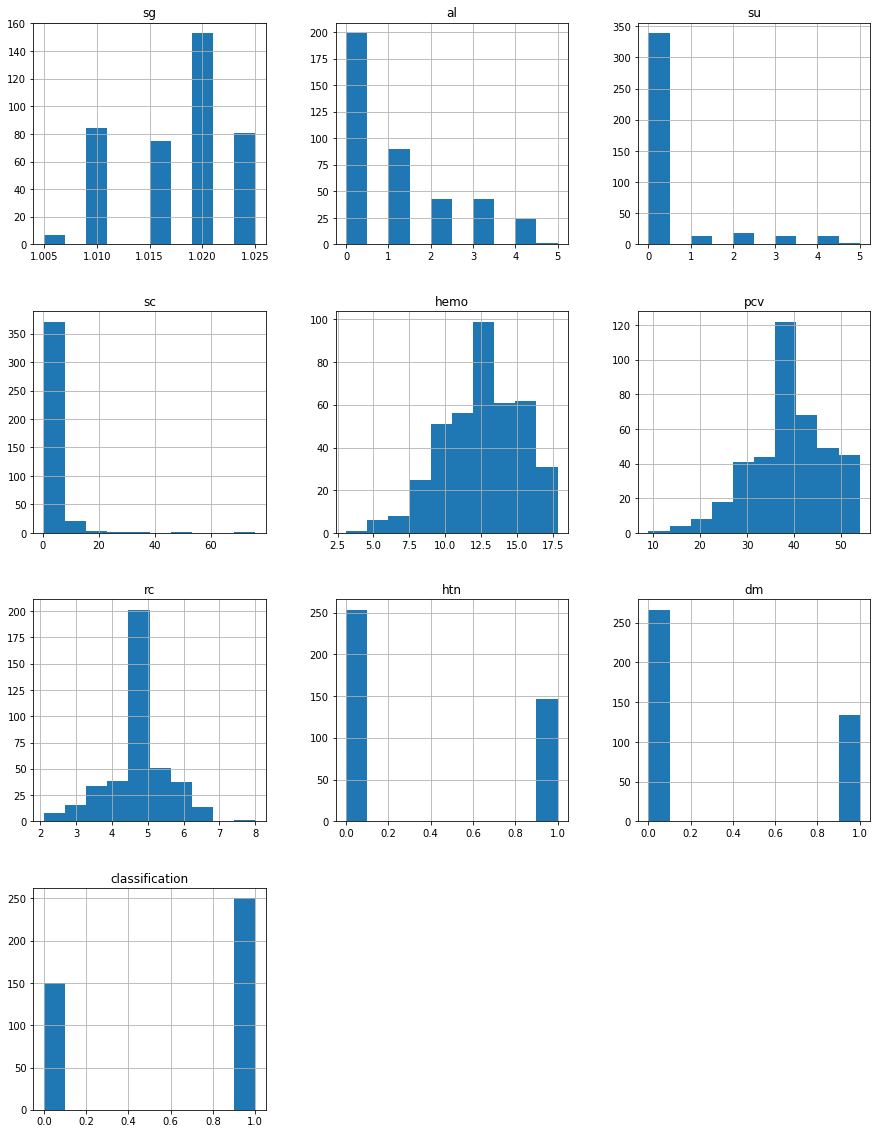

In [230]:
#data visualisation in histogram 
df.hist(figsize = (15,20))    #to check the distribution of the features 
#Observations:
    #1.hemo looks a bit left skewed
    #2.pcv is left skewed
   # 3.bpis also a bit right skewed
    #4.Rest of the features are lightly skewed

In [231]:
#correlation
df[["htn", "classification"]].corr()

,htn,classification
htn,1.000000,0.590438
classification,0.590438,1.000000


In [232]:
df[["dm", "classification"]].corr()

,dm,classification
dm,1.000000,0.549778
classification,0.549778,1.000000


(0.0, 1.0500000000000016)

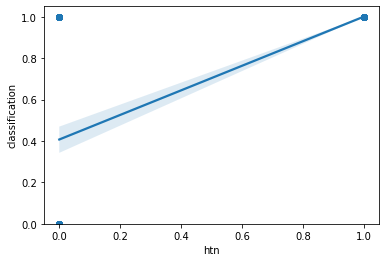

In [233]:
sns.regplot(x="htn", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.050000000000002)

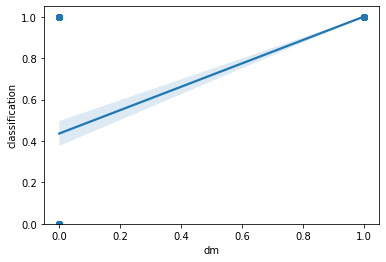

In [234]:
sns.regplot(x="dm", y="classification", data=df)
plt.ylim(0,)

(0.0, 2.077398832157378)

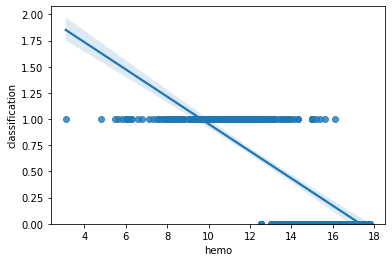

In [235]:
sns.regplot(x="hemo", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.7042706835720194)

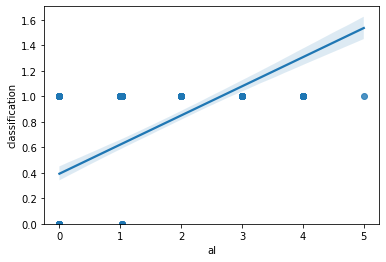

In [236]:
sns.regplot(x="al", y="classification", data=df)
plt.ylim(0,)

(0.0, 5.21254281156475)

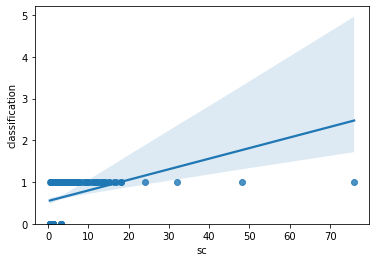

In [237]:
sns.regplot(x="sc", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.4966523005973762)

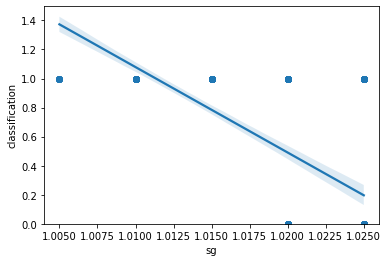

In [238]:
sns.regplot(x="sg", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.512848132487862)

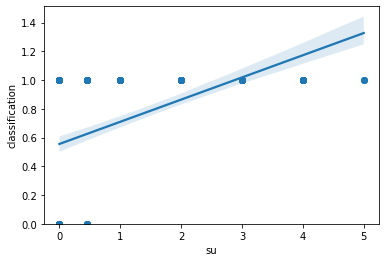

In [239]:
sns.regplot(x="su", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.7550615012167075)

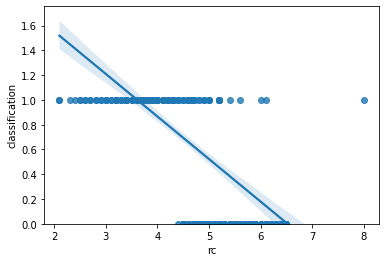

In [240]:
sns.regplot(x="rc", y="classification", data=df)
plt.ylim(0,)

In [241]:
#split the data into independent (x) data set (the features) and dependent (y) dataset (the target)
X= df.drop(['classification'], axis = 1) #to drop the column  classification
y= df['classification'] #ti contains all target that we want

In [242]:
#feature scaling  #Scaling data to standard deviation range to reduce computing and increase model performence
#min-max scaler method sclaes the dataset so that all the input feautres lie between 0 and 1
#x_scaler = MinMaxScaler()
#x_scaler.fit(X)
#column_names = X.columns
#X[column_names] = x_scaler.transform(X)
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [243]:
X.shape

(400, 9)

In [244]:
#Split the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [245]:
# defining dependent y
y = df.iloc[:, -1]
y.head(3)

0    1
1    1
2    1
Name: classification, dtype: int64

In [246]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

(320, 9)
(80, 9)


In [247]:
#print the shape of the new y objects 287 total patients after dropping nan . 229 for tain 58 patients for testing
print (y_train.shape)
print (y_test.shape)

(320,)
(80,)


In [248]:
#build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset
mlp= Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

In [249]:
#compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not
#loss fn measures how well the model does the training
#optimizer =adam
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [250]:
#train the model
#epochs is the number of genration over the entire data set to train on
#batch size is the number of several graidient for training
history = mlp.fit(X_train, y_train, epochs = (2000), batch_size = X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 343ms/step - loss: 0.6989 - accuracy: 0.3656
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.6094
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.8375
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.9438
Epoch 5/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6623 - accuracy: 0.9094
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.8656
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.8313
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.8031
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6285 - accuracy: 0.8031
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.8000
Epoch 11/2000
1/

In [251]:
#save the model
mlp.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


Assets written to: ckd.model/assets

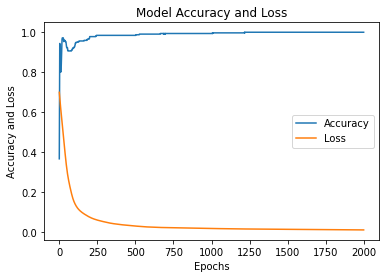

In [252]:
#visualise the model loss and accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [253]:
#to check if the patient has ckd or not
#get the shape of the training and the testing data
#training data 229 pateints rows and 6 colums datapoints
#test data 58 pateints row and 6 colums datapoints

print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)

shape of the training data: (320, 9)
shape of the test data (80, 9)


In [254]:
#to see how the model preidcts and diagnos patients
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

[0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1]

In [255]:
#show the actual values. if the patient actually has ckd or not
y_test

320    0
63     1
265    0
366    0
189    1
      ..
348    0
256    0
290    0
293    0
194    1
Name: classification, Length: 80, dtype: int64

In [256]:
#y.value_counts()

In [257]:
#among 400 cases in the dataset 250 cases are ckd, and 150 cases are not ckd

#y.dtypes

In [258]:
# converting y to numpy 1D array
#y = y.values

In [259]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

Original: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
Predicted: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1


In [260]:
from sklearn.metrics import accuracy_score
mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

Multi Layer Perceptron Model Accuracy: 97.5%


In [261]:
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)
mlp_conf_matrix

array([[34,  0],
       [ 2, 44]])

Text(33.0, 0.5, 'Truth')

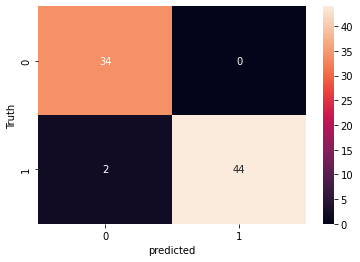

In [262]:
sns.heatmap(mlp_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [263]:
tn, fp, fn, tp = confusion_matrix(y_test, mlp_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 34
False Pos: 0
False Neg: 2
True Pos: 44


In [264]:
mlp_classification_report = classification_report(y_test, mlp_pred)
print(mlp_classification_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.96      0.98        46

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [265]:
#type(y)

In [266]:
#y

In [267]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

(320, 9)
(80, 9)


In [268]:
#print the shape of the new y objects 287 total patients after dropping nan . 248 for tain 63 patients for testing
print (y_train.shape)
print (y_test.shape)

(320,)
(80,)


In [269]:
#knn
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [270]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [271]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in knn_pred)))

Original: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
Predicted: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1


In [272]:
# Checking Model prediction accuracy
knn_acc = round(accuracy_score(y_test, knn_pred)*100, 2)
print(f'KNN Accuracy {knn_acc}%')

KNN Accuracy 97.5%


In [273]:
#Tuning KNN Model Accurecy using 10-fold cross validation, n_neighbors

In [274]:

from sklearn.model_selection import cross_val_score

accuracy = []
for n in range(1, 20):
	knn = KNeighborsClassifier(n_neighbors=n)
	acc = cross_val_score(knn, X, y, cv=11)
	accuracy.append(round(acc.mean()*100, 2))
accuracy

[99.0,
 98.49,
 97.99,
 97.73,
 97.49,
 97.73,
 97.74,
 97.74,
 98.24,
 97.99,
 98.25,
 97.99,
 98.24,
 97.99,
 98.24,
 97.73,
 97.99,
 97.99,
 97.99]

In [275]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_conf_matrix

array([[34,  0],
       [ 2, 44]])

Text(33.0, 0.5, 'Truth')

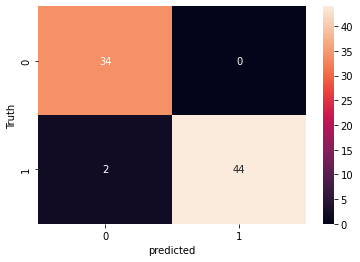

In [276]:
sns.heatmap(knn_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [277]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 34
False Pos: 0
False Neg: 2
True Pos: 44


In [278]:
knn_classification_report = classification_report(y_test, knn_pred)
print(knn_classification_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.96      0.98        46

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [279]:
# Choosing a K Value.
# Let's go ahead and use the elbow method to pick a good k value.
from sklearn.model_selection import cross_val_score
error_rate = []

# Will take some time
#for i in range(1,40):
    
   # knn = KNeighborsClassifier(n_neighbors=i)
   # knn.fit(X_train,y_train)
    #pred_i = knn.predict(X_test)
   #error_rate.append(np.mean(pred_i != y_test))

In [280]:
#plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')

In [281]:
#Random Forest Classifier
rf = RandomForestClassifier(max_depth=20, n_estimators=21)
rf.fit(X_train, y_train)
RandomForestClassifier(max_depth=20, n_estimators=21)
rf_pred = rf.predict(X_test)
rf_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [283]:
# Checking Model prediction accurecy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

Random Forest Accuracy: 98.75%


In [284]:
#Tuning Model Accurecy using Cross Validation and n_estimators
from sklearn.model_selection import cross_val_score

rf_accuracy = []
for n in range(10, 30):
	rf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rf, X, y, cv=10)
	rf_accuracy.append(round(acc.mean()*100, 2))
rf_accuracy

[99.75,
 99.25,
 99.75,
 99.0,
 99.75,
 99.25,
 99.25,
 99.25,
 99.5,
 99.25,
 98.75,
 99.0,
 99.0,
 99.0,
 98.75,
 99.5,
 99.25,
 99.25,
 99.0,
 99.0]

In [285]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_conf_matrix

array([[34,  0],
       [ 1, 45]])

Text(33.0, 0.5, 'Truth')

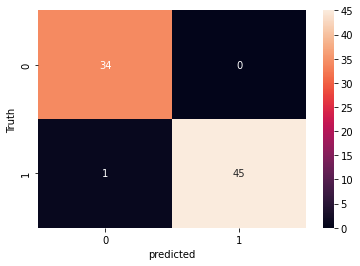

In [286]:
sns.heatmap(rf_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [287]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 34
False Pos: 0
False Neg: 1
True Pos: 45


In [288]:
rf_classification_report = classification_report(y_test, rf_pred)
print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        46

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [289]:
#SVM -> SVC Model [Support Vector Classifier]
from sklearn.svm import SVC
svc = SVC(C=1.5)
svc.fit(X_train, y_train)

SVC(C=1.5)

In [290]:
svc_pred = svc.predict(X_test)
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accuracy: {svc_acc}%')

SVM Accuracy: 97.5%


In [291]:
from sklearn import svm
clf= svm.SVC(kernel='linear', C=1).fit(X_train,y_train)
clf.score(X_test, y_test)  #Test

0.975

In [292]:
clf.score(X_train, y_train) #cross validation

0.9875

In [293]:
svc_pred = svc.predict(X_test)

In [294]:
svc_conf_matrix = confusion_matrix(y_test, svc_pred)
svc_conf_matrix

array([[34,  0],
       [ 2, 44]])

Text(33.0, 0.5, 'Truth')

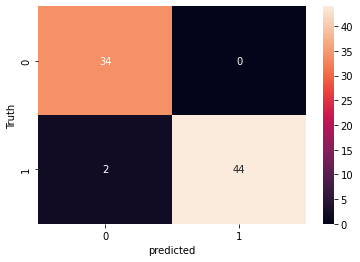

In [295]:
sns.heatmap(svc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [296]:
tn, fp, fn, tp = confusion_matrix(y_test, svc_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 34
False Pos: 0
False Neg: 2
True Pos: 44


In [297]:
svc_classification_report = classification_report(y_test, svc_pred)
print(svc_classification_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.96      0.98        46

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [298]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [299]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [300]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in gnb_pred)))

Original: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
Predicted: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1


In [301]:
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, 2)
print(f'GNB Model Accuracy: {gnb_acc}%')

GNB Model Accuracy: 93.75%


In [302]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)
gnb_conf_matrix

array([[34,  0],
       [ 5, 41]])

Text(33.0, 0.5, 'Truth')

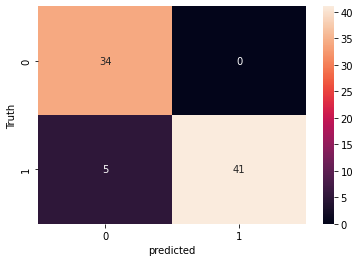

In [303]:
sns.heatmap(gnb_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

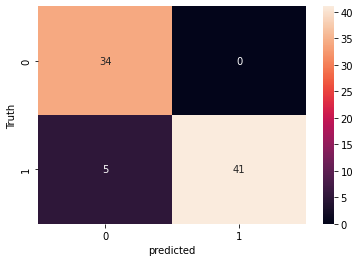

In [304]:
sns.heatmap(gnb_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [305]:
tn, fp, fn, tp = confusion_matrix(y_test, gnb_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 34
False Pos: 0
False Neg: 5
True Pos: 41


In [306]:
gnb_classification_report = classification_report(y_test, gnb_pred)
print(gnb_classification_report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        34
           1       1.00      0.89      0.94        46

    accuracy                           0.94        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



In [307]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [308]:
dtc_pred = dtc.predict(X_test)
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accuracy: {dtc_acc}%')

Decision Tree Classifier Accuracy: 97.5%


In [309]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in dtc_pred)))

Original: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
Predicted: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1


In [310]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_conf_matrix

array([[34,  0],
       [ 2, 44]])

Text(33.0, 0.5, 'Truth')

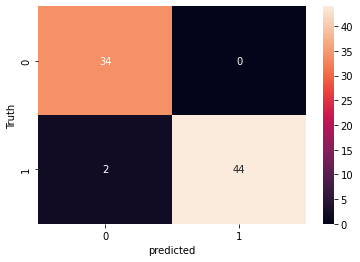

In [311]:
sns.heatmap(dtc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [312]:
tn, fp, fn, tp = confusion_matrix(y_test, dtc_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 34
False Pos: 0
False Neg: 2
True Pos: 44


In [313]:
dtc_classification_report = classification_report(y_test, dtc_pred)
print(dtc_classification_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.96      0.98        46

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [314]:
#logistics regression train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [315]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

Logistic Regression: 97.5%


In [316]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

Original: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
Predicted: 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1


In [317]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

array([[34,  0],
       [ 2, 44]])

Text(33.0, 0.5, 'Truth')

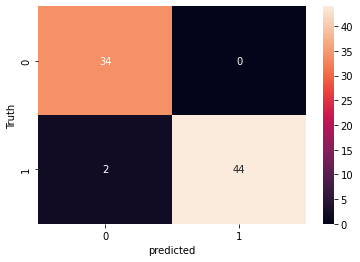

In [318]:
sns.heatmap(logreg_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [319]:
tn, fp, fn, tp = confusion_matrix(y_test, logreg_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 34
False Pos: 0
False Neg: 2
True Pos: 44


In [320]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.96      0.98        46

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [322]:
#model comparison 
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'GNB', 'MLP', 'SVM', 'Logistics Regression' ],
    'Score' : [ dtc_acc, rf_acc, knn_acc, gnb_acc, mlp_acc, svc_acc, logreg_acc ]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest Classifier,98.75
0,Decision Tree Classifier,97.50
2,KNN,97.50
4,MLP,97.50
5,SVM,97.50
6,Logistics Regression,97.50
3,GNB,93.75


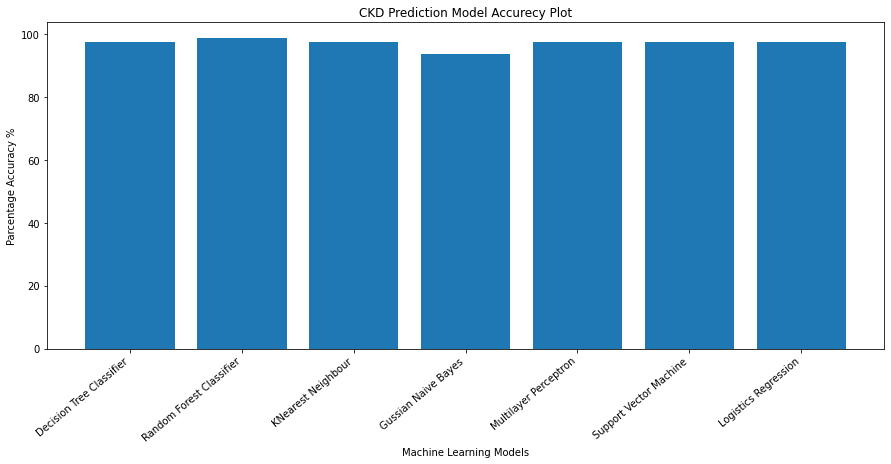

In [324]:
plt.figure(figsize=(15, 6))
models = ['Decision Tree Classifier', 'Random Forest Classifier', 'KNearest Neighbour', 'Gussian Naive Bayes', 'Multilayer Perceptron', 'Support Vector Machine', 'Logistics Regression' ]
models_acc = [dtc_acc, rf_acc, knn_acc, gnb_acc, mlp_acc, svc_acc, logreg_acc ]
# xax = [1, 2, 3, 4, 5]

plt.title('CKD Prediction Model Accurecy Plot')
plt.bar(models, models_acc, label=models)
plt.xticks(models, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('Machine Learning Models')
# plt.legend()

# plt.savefig('figName.png', dpi=300)
plt.show()

<AxesSubplot:>

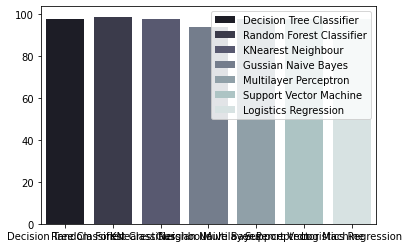

In [325]:
sns.barplot(models, models_acc, palette="bone", hue=models, dodge=False)

# Model Evaluation

In [326]:
#roc curve

In [327]:
#Generate sythetic data

In [356]:
from sklearn.datasets import make_classification

In [357]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [358]:
#Add noisy features to make the problem more difficult 

In [359]:
import numpy as np

In [360]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [361]:
#Data splitting

In [362]:
from sklearn.model_selection import train_test_split

In [363]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [364]:
#Build classification model

In [365]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier #for MLP

In [367]:
#Random forest
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [368]:
#nb
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [369]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [370]:
#svc
svc = SVC(C=1.5)
svc.fit(X_train, Y_train)

SVC(C=1.5)

In [371]:
#DTC
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [372]:
#logreg
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [373]:
#ANN
import keras as k
mlp = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter=1000)
mlp.fit(X_train, Y_train.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [374]:
#Model evaluation 

In [375]:
#Prediction probabilities

In [376]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)
logreg_probs = logreg.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)

In [377]:
#Probabilities for the positive outcome is kept.

In [379]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
logreg_probs = logreg_probs[:, 1]
mlp_probs = mlp_probs[:, 1]

In [380]:

#Computing AUROC and ROC curve values

In [381]:
from sklearn.metrics import roc_curve, roc_auc_score

In [382]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)
dtc_auc = roc_auc_score(Y_test, dtc_probs)
logreg_auc = roc_auc_score(Y_test, logreg_probs)
mlp_auc = roc_auc_score(Y_test, mlp_probs)

In [383]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('Logistic Regression: AUROC = %.3f' % (logreg_auc))
print('Multi Layer Perceptron: AUROC = %.3f' % (mlp_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.925
Naive Bayes: AUROC = 0.993
K Nearest Neighbors: AUROC = 0.580
Decision Tree: AUROC = 0.969
Logistic Regression: AUROC = 0.947
Multi Layer Perceptron: AUROC = 0.700


In [384]:
#Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(Y_test, dtc_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(Y_test, logreg_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(Y_test, mlp_probs)

In [385]:
nb_fpr, nb_tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00483092, 0.00483092, 0.00483092, 0.00483092,
        0.0531401 , 0.0531401 , 0.06280193, 0.06280193, 0.08695652,
        0.08695652, 0.12560386, 0.12560386, 0.2705314 , 0.2705314 ,
        1.        ]),
 array([0.        , 0.14507772, 0.17098446, 0.1761658 , 0.20725389,
        0.21761658, 0.21761658, 0.22279793, 0.23316062, 0.97409326,
        0.97409326, 0.97927461, 0.97927461, 0.98445596, 0.98445596,
        0.98963731, 0.98963731, 0.99481865, 0.99481865, 1.        ,
        1.        ]))

In [386]:
knn_fpr, knn_tpr

(array([0.        , 0.04347826, 0.16908213, 0.50241546, 0.79710145,
        0.97101449, 1.        ]),
 array([0.        , 0.06217617, 0.2642487 , 0.61658031, 0.88082902,
        0.97927461, 1.        ]))

In [387]:
dtc_fpr, dtc_tpr

(array([0.        , 0.01449275, 1.        ]),
 array([0.        , 0.95336788, 1.        ]))

In [388]:
mlp_fpr, mlp_tpr

(array([0.        , 0.        , 0.        , 0.00483092, 0.00483092,
        0.00966184, 0.00966184, 0.01449275, 0.01449275, 0.01932367,
        0.01932367, 0.02898551, 0.02898551, 0.03381643, 0.03381643,
        0.04347826, 0.04347826, 0.04830918, 0.04830918, 0.06280193,
        0.06280193, 0.07729469, 0.07729469, 0.0821256 , 0.0821256 ,
        0.09178744, 0.09178744, 0.10144928, 0.10144928, 0.10628019,
        0.10628019, 0.11594203, 0.11594203, 0.12077295, 0.12077295,
        0.13043478, 0.13043478, 0.14492754, 0.14492754, 0.15458937,
        0.15458937, 0.16425121, 0.16425121, 0.16908213, 0.16908213,
        0.19323671, 0.19323671, 0.20289855, 0.20289855, 0.20772947,
        0.20772947, 0.22222222, 0.22222222, 0.22705314, 0.22705314,
        0.23188406, 0.23188406, 0.24154589, 0.24154589, 0.25603865,
        0.25603865, 0.2705314 , 0.2705314 , 0.28019324, 0.28019324,
        0.28985507, 0.28985507, 0.30917874, 0.30917874, 0.31400966,
        0.31400966, 0.3236715 , 0.3236715 , 0.33

In [389]:
#Plot the ROC curve

In [390]:
import matplotlib.pyplot as plt

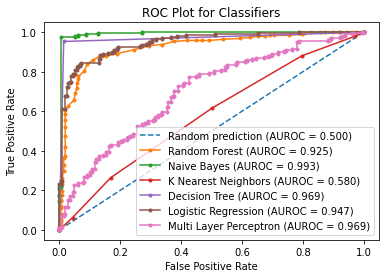

In [403]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logreg_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multi Layer Perceptron (AUROC = %0.3f)' % dtc_auc)
# Title
plt.title('ROC Plot for Classifiers')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
#plt.show()     #nb has the highest provided the best erfromacne of about aucov alomost 1

In [404]:
rf_auc

0.9250456809591749

In [405]:
nb_auc

0.9932417211083577

In [406]:
logreg_auc

0.9470100873570123

In [407]:
knn_auc

0.5797226602588171

In [408]:
dtc_auc

0.96943756101224

In [410]:
rf_auc

0.9250456809591749

In [411]:
r_auc

0.5

In [412]:
print('nb: %.2f' % nb_auc)

nb: 0.99


In [413]:
#Save ROC plot
from IPython.display import Image, display
#Save plot to files
plt.savefig('CKDroc.pdf')

<Figure size 432x288 with 0 Axes>

In [414]:
plt.savefig('roc.png')

<Figure size 432x288 with 0 Axes>

In [415]:
! ls -l

total 37088
-rw-r--r-- 1 ftp fax 31435866 Apr  6 12:25 '20019561 energy prediction.ipynb'
-rw-r--r-- 1 ftp fax   390524 Apr 22  2021 'Canada (7).xlsx'
drwxr-xr-x 4 ftp fax     6144 Apr  6 14:43  ckd.model
-rw-r--r-- 1 ftp fax  1980186 Apr  6 14:58  CKDPrediction.ipynb
-rw-r--r-- 1 ftp fax     1290 Apr  6 14:58  CKDroc.pdf
-rw-r--r-- 1 ftp fax    44059 Apr 22  2021  clean_df.xls
-rw-r--r-- 1 ftp fax    33297 Apr  6 14:43  cleanedckddata.csv
-rw-r--r-- 1 ftp fax    42107 Apr  6 12:09  kidney_disease.csv
-rw-r--r-- 1 ftp fax    48479 Apr 22  2021 'Lab-4-Model-Development (1).ipynb'
lrwxrwxrwx 1 ftp fax       24 Feb  1 23:38 '⚡ → Production' -> /home/ftp/.naas/home/ftp
-rw-r--r-- 1 ftp fax     1257 Apr  6 14:58  roc.png
-rw-r--r-- 1 ftp fax    13301 Apr  6 12:09  Untitled1.ipynb
-rw-r--r-- 1 ftp fax     3345 Apr  6 12:09  Untitled2.ipynb
-rw-r--r-- 1 ftp fax      604 Feb  2 00:40  Untitled3.ipynb
drwxr-xr-x 2 ftp fax     6144 Apr 22  2021 'Untitled Folder'
drwxr-xr-x 4 ftp fax     6144 Apr

In [416]:

#View the generated PNG and PDF files

In [417]:

print('nb: %.4f' % nb_auc)

nb: 0.9932


In [418]:
#svm evaluation
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [419]:
#roc curve svm
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train, Y_train)
pred_svm=svm.predict(X_test)
probs_svm=svm.decision_function(X_test)

In [420]:
def plot_roc(Y_test, probs):
  fpr,tpr,threshold=roc_curve(Y_test,probs)
  fpr,tpr,threshold=roc_curve(Y_test,probs)
  roc_auc=auc(fpr,tpr)
  print('ROC AUC=0.2f'%roc_auc)
  plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'b--')
  plt.xlim([0,1])
  plt.ylim([0,1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

ROC AUC=0.2f


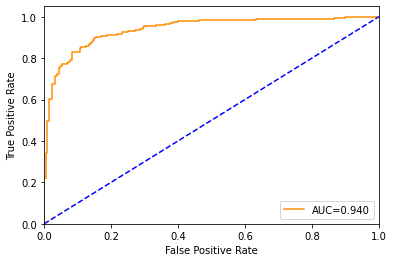

In [421]:
plot_roc(Y_test,probs_svm)

In [422]:
X.shape #of noisy valiation data

(2000, 2010)

In [423]:
Y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,

In [424]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

(1600, 2010)
(400, 2010)


In [425]:
#END